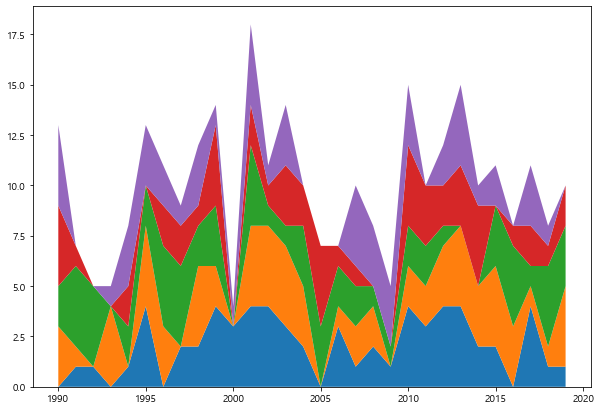

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

x = np.arange(1990, 2020)
y = [np.random.randint(0, 5, size=30) for _ in range(5)]

fig, ax = plt.subplots(figsize=(10, 7))

ax.stackplot(x, y)
plt.show()

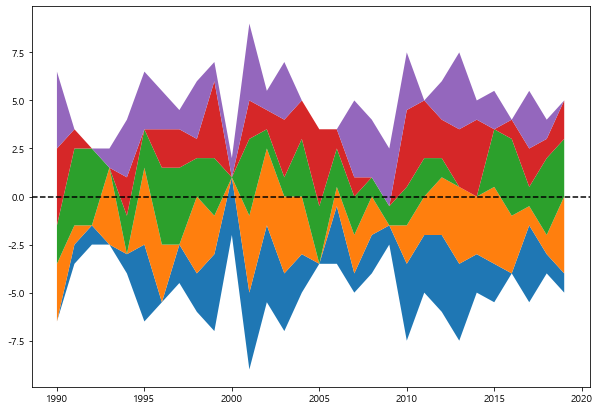

In [7]:
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(10, 7))
ax.stackplot(x,
             y,
             baseline="sym"                     # 수평 0 라인을 중심으로 대칭
             )
ax.axhline(0, color="black", ls="--")           # 수평선

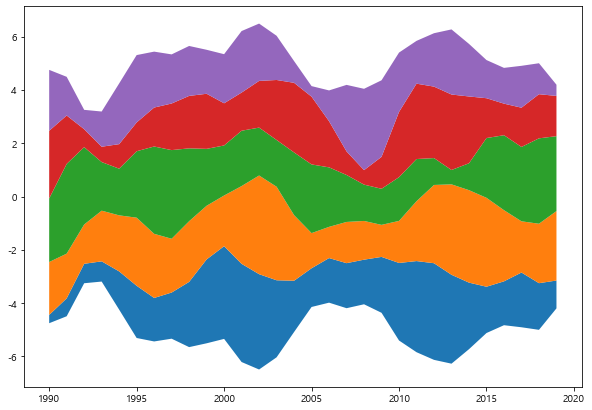

In [8]:
# 차트 평활화(매끄럽게)
def gaussian_smooth(x, y, sd):
    weights = np.array([stats.norm.pdf(x, m, sd) for m in x])
    weights = weights / weights.sum(1)
    return (weights * y).sum(1)

plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(10, 7))
y_smoothed = [gaussian_smooth(x, y_, 1) for y_ in y]
ax.stackplot(x, y_smoothed, baseline="sym")

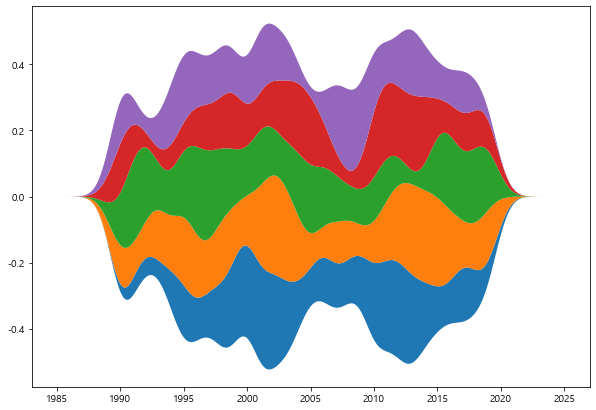

In [9]:
# grid 추가
def gaussian_smooth(x, y, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
    weights = weights / weights.sum(0)
    return (weights * y).sum(1)

fig, ax = plt.subplots(figsize=(10, 7))
grid = np.linspace(1985, 2025, num=500)
y_smoothed = [gaussian_smooth(x, y_, grid, 1) for y_ in y]
ax.stackplot(grid, y_smoothed, baseline="sym")

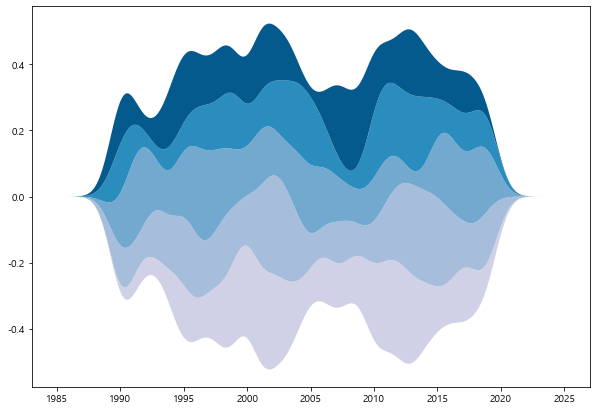

In [10]:
# 색상 정의
COLORS = ["#D0D1E6", "#A6BDDB", "#74A9CF", "#2B8CBE", "#045A8D"]

fig, ax = plt.subplots(figsize=(10, 7))

ax.stackplot(grid,
             y_smoothed,
             colors=COLORS,         # 색상반영
             baseline="sym"
             )